In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_first = pd.read_csv('c:\\temp\\transaction_data.csv',delimiter=',' , encoding='Windows-1251')

In [3]:
df_first.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [12]:
df_first.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [11]:
df_first = df_first.astype({'date':'datetime64'})

In [15]:
df_transac = df_first.groupby('transaction',as_index=False).agg({'name':'count'})

<AxesSubplot:xlabel='transaction', ylabel='name'>

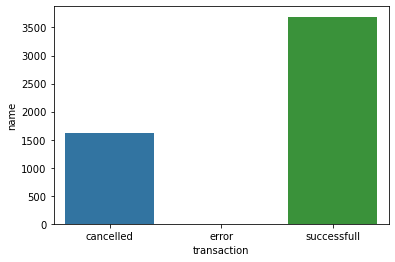

In [16]:
sns.barplot(data=df_transac, x='transaction', y='name')

In [19]:
df_name = df_first.query('transaction == "successfull"').\
            groupby('name',as_index=False).\
            agg({'transaction':'count'})

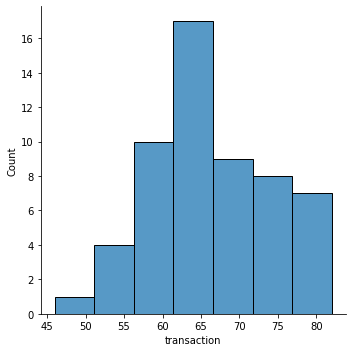

In [20]:
sns.displot(df_name.transaction)

In [30]:
df_second = pd.read_csv('c:\\temp\\transaction_data_updated.csv',delimiter=',' , encoding='Windows-1251')

In [31]:
df_second.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [32]:
df_second.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [33]:
df_second = df_second.astype({'date':'datetime64'})

In [35]:
df_second['minutes'] = df_second.date.dt.minute

In [36]:
df_second.head()

,date,name,transaction,minute,minutes
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [38]:
df_minut = df_second.query('transaction == "successfull"').\
            groupby(['name','minutes'],as_index=False).\
            agg({'transaction':'count'})

In [44]:
user_vs_minute_pivot = df_minut.pivot(index='minutes',columns='name',values='transaction').reset_index().fillna(0)

In [45]:
user_vs_minute_pivot.head()

name,minutes,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,1.0,3.0,2.0,1.0,3.0,2.0,2.0,1.0,1.0,...,0.0,3.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0
1,1,3.0,3.0,0.0,2.0,2.0,5.0,4.0,2.0,3.0,...,3.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,2,1.0,1.0,3.0,3.0,1.0,0.0,2.0,2.0,2.0,...,2.0,1.0,2.0,3.0,0.0,1.0,2.0,1.0,1.0,1.0
3,3,1.0,0.0,1.0,0.0,4.0,2.0,0.0,3.0,2.0,...,1.0,4.0,4.0,2.0,3.0,0.0,3.0,4.0,0.0,0.0
4,4,3.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0
